In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.metrics import accuracy_score

# Read Json File

In [152]:
data = json.load(open("qbs_json.json", 'rb'))

In [153]:
def get_date():
    date = []

    i = 1
    while i < len(data["GetBalanceSheet"]["Columns"]["Column"]):
        date.append(data["GetBalanceSheet"]["Columns"]["Column"][i]["MetaData"][0]['Value'][0:7])
        i = i + 1
        
    return date

In [154]:
def get_date_length():
    return len(get_date())

In [155]:
def get_net_income():
    net_income = []
    Get_Net_Income = 0

    i = 1
    while i < 26:
        Get_Net_Income = data["GetProfitAndLossReport"]["Rows"]['Row'][7]['Summary']['ColData'][i]['value']
        net_income.append(Get_Net_Income)
        i = i + 1
    return net_income

In [156]:
def get_gross_profit():
    gross_profit = []
    Get_Gross_Porfit = 0

    i = 1
    while i < 26:
        Get_Gross_Profit = data["GetProfitAndLossReport"]["Rows"]['Row'][2]['Summary']['ColData'][i]['value']
        gross_profit.append(Get_Gross_Profit)
        i = i + 1
    return gross_profit

In [157]:
def get_total_expenses():
    total_expenses = []
    Get_Total_Expenses = 0

    i = 1
    while i < 26:
        Get_Total_Expenses = data["GetProfitAndLossReport"]["Rows"]['Row'][3]['Summary']['ColData'][i]['value']
        total_expenses.append(Get_Total_Expenses)
        i = i + 1
    return total_expenses

In [158]:
def get_net_operating_income():
    net_operating_income = []
    Get_Total_Net_Operating_Income = 0

    i = 1
    while i < 26:
        Get_Total_Net_Operating_Income = data["GetProfitAndLossReport"]["Rows"]['Row'][4]['Summary']['ColData'][i]['value']
        net_operating_income.append(Get_Total_Net_Operating_Income)
        i = i + 1
    return net_operating_income

In [159]:
def get_total_other_expenses():
    total_other_expenses = []
    Get_Total_Other_Expenses = 0

    i = 1
    while i < 26:
        Get_Total_Other_Expenses = data["GetProfitAndLossReport"]["Rows"]['Row'][5]['Summary']['ColData'][i]['value']
        total_other_expenses.append(Get_Total_Other_Expenses)
        i = i + 1
    return total_other_expenses

In [160]:
def sum_of_month(date):
    sum = 0
    for i in date:
        sum = sum + i
    return sum

In [161]:
def get_total_amount_of_bill():
    bills = []
    one_bill = []
    Date = 0
    Amount = 0
    
    b = {}
    new_get_date = []
    month1,month2,month3,month4,month5,month6,month7,month8,month9 = [],[],[],[],[],[],[],[],[]

    i = 0
    while i < len(data["BillQueryRaw"]["QueryResponse"]["Bill"]):
        Date = data["BillQueryRaw"]["QueryResponse"]["Bill"][i]["DueDate"][0:7]
        Amount = data["BillQueryRaw"]['QueryResponse']['Bill'][i]["TotalAmt"]
        one_bill = [Date, Amount]
        bills.append(one_bill)
        i = i + 1

    for k in bills:
        date = k[0]
        new_get_date.append(date)
    new_get_date.sort(reverse=True)
    month = b.fromkeys(new_get_date)
    date_new = list(month.keys())
    date_new.insert(4, "2020-05")

    for d in date_new:
        if d not in get_date():
            date_new.remove(d)

    for cal in bills:
        if cal[0] == date_new[0]:
            month1.append(cal[1])
        elif cal[0] == date_new[1]:
            month2.append(cal[1])
        elif cal[0] == date_new[2]:
            month3.append(cal[1])
        elif cal[0] == date_new[3]:
            month4.append(cal[1])
        elif cal[0] == date_new[4]:
            month5.append(cal[1])
        elif cal[0] == date_new[5]:
            month6.append(cal[1])
        elif cal[0] == date_new[6]:
            month7.append(cal[1])
        elif cal[0] == date_new[7]:
            month8.append(cal[1])
        elif cal[0] == date_new[8]:
            month9.append(cal[1])

    total_amount_of_bill = [sum_of_month(month1),sum_of_month(month2),
                            sum_of_month(month3),sum_of_month(month4),
                            sum_of_month(month5),sum_of_month(month6),
                            sum_of_month(month7),sum_of_month(month8)]

    while len(total_amount_of_bill) < get_date_length():
        total_amount_of_bill.append(0)

    new_total_amount_of_bill = total_amount_of_bill[::-1]

        
    return new_total_amount_of_bill

In [162]:
def get_total_current_assets():
    total_current_assets = []
    Get_Total_Current_Assets = 0

    i = 1
    while i < len(data["GetBalanceSheet"]["Rows"]["Row"][0]["Rows"]["Row"][0]["Summary"]["ColData"]):
        Get_Total_Current_Assets = data["GetBalanceSheet"]["Rows"]["Row"][0]["Rows"]["Row"][0]["Summary"]["ColData"][i]["value"]
        total_current_assets.append(Get_Total_Current_Assets)
        i = i + 1

    return total_current_assets

In [163]:
def get_total_bank_accounts():
    total_bank_accounts = []
    Get_Total_Bank_Accounts = 0

    i = 1
    while i < len(data["GetBalanceSheet"]["Rows"]["Row"][0]["Rows"]["Row"][0]["Rows"]["Row"][0]["Summary"]["ColData"]):
        Get_Total_Bank_Accounts = data["GetBalanceSheet"]["Rows"]["Row"][0]["Rows"]["Row"][0]["Rows"]["Row"][0]["Summary"]["ColData"][i]["value"]
        total_bank_accounts.append(Get_Total_Bank_Accounts)
        i = i + 1

    return total_bank_accounts

In [164]:
def get_total_accounts_receivable():
    total_accounts_receivable = []
    Get_Total_Accounts_Receivable = 0

    i = 1
    while i < len(data["GetBalanceSheet"]["Rows"]["Row"][0]["Rows"]["Row"][0]["Rows"]["Row"][1]["Summary"]["ColData"]):
        Get_Total_Accounts_Receivable  = data["GetBalanceSheet"]["Rows"]["Row"][0]["Rows"]["Row"][0]["Rows"]["Row"][1]["Summary"]["ColData"][i]["value"]
        total_accounts_receivable.append(Get_Total_Accounts_Receivable )
        i = i + 1

    return total_accounts_receivable

In [165]:
def get_total_assets():
    total_assets = []
    Get_Total_Assets = 0

    i = 1
    while i <len(data["GetBalanceSheet"]["Rows"]["Row"][0]["Summary"]["ColData"]):
        Get_Total_Assets = data["GetBalanceSheet"]["Rows"]["Row"][0]["Summary"]["ColData"][i]["value"]
        total_assets.append(Get_Total_Assets)
        i = i + 1

    return total_assets

In [166]:
def get_total_liabilities():
    total_liabilities = []
    Get_Total_Liabilities = 0

    i = 1
    while i < len(data["GetBalanceSheet"]["Rows"]["Row"][1]["Rows"]["Row"][0]["Summary"]["ColData"]):
        Get_Total_Liabilities = data["GetBalanceSheet"]["Rows"]["Row"][1]["Rows"]["Row"][0]["Summary"]["ColData"][i]["value"]
        total_liabilities.append(Get_Total_Liabilities)
        i = i + 1

    return total_liabilities

In [167]:
def get_total_equity():
    total_equity = []
    Get_Total_Equity = 0

    i = 1
    while i < len(data["GetBalanceSheet"]["Rows"]["Row"][1]["Rows"]["Row"][1]["Summary"]["ColData"]):
        Get_Total_Equity = data["GetBalanceSheet"]["Rows"]["Row"][1]["Rows"]["Row"][1]["Summary"]["ColData"][i]["value"]
        total_equity.append(Get_Total_Equity)
        i = i + 1

    return total_equity

In [168]:
def get_total_liabilities_and_equity():
    total_liabilities_and_equity = []
    Get_Tolta_Liabilities_and_Equity = 0

    i = 1
    while i < len(data["GetBalanceSheet"]["Rows"]["Row"][1]['Summary']["ColData"]):
        Get_Total_Liabilities_and_Equity = data["GetBalanceSheet"]["Rows"]["Row"][1]['Summary']["ColData"][i]["value"]
        total_liabilities_and_equity.append(Get_Total_Liabilities_and_Equity)
        i = i + 1
        
    return total_liabilities_and_equity

In [169]:
def get_total_amount_of_invoice():
    invoice = []
    one_invoice = []
    Date = 0
    Amount = 0

    b = {}
    new_get_date = []
    month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12,month13,month14 = [],[],[],[],[],[],[],[],[],[],[],[],[],[]

    i = 0
    while i < len(data["InvoiceQueryRaw"]["QueryResponse"]["Invoice"]):
        Date = data["InvoiceQueryRaw"]["QueryResponse"]["Invoice"][i]["TxnDate"][0:7]
        Amount = data["InvoiceQueryRaw"]["QueryResponse"]["Invoice"][i]["TotalAmt"]
        one_invoice = [Date, Amount]
        invoice.append(one_invoice)
        i = i + 1

    for k in invoice:
        date = k[0]
        new_get_date.append(date)
    new_get_date.sort(reverse=True)
    month = b.fromkeys(new_get_date)
    date_new = list(month.keys())
    date_new.insert(9, "2020-01")
    date_new.insert(10, "2019-12")

    for d in date_new:
        if d not in get_date():
            date_new.remove(d)

    for cal in invoice:
        if cal[0] == date_new[0]:
            month1.append(cal[1])
        elif cal[0] == date_new[1]:
            month2.append(cal[1])
        elif cal[0] == date_new[2]:
            month3.append(cal[1])
        elif cal[0] == date_new[3]:
            month4.append(cal[1])
        elif cal[0] == date_new[4]:
            month5.append(cal[1])
        elif cal[0] == date_new[5]:
            month6.append(cal[1])
        elif cal[0] == date_new[6]:
            month7.append(cal[1])
        elif cal[0] == date_new[7]:
            month8.append(cal[1])
        elif cal[0] == date_new[8]:
            month9.append(cal[1])
        elif cal[0] == date_new[9]:
            month10.append(cal[1])
        elif cal[0] == date_new[10]:
            month11.append(cal[1])
        elif cal[0] == date_new[11]:
            month12.append(cal[1])
        elif cal[0] == date_new[12]:
            month13.append(cal[1])
        elif cal[0] == date_new[13]:
            month14.append(cal[1])


    total_amount_of_invoice = [sum_of_month(month1),sum_of_month(month2),
                               sum_of_month(month3),sum_of_month(month4),
                               sum_of_month(month5),sum_of_month(month6),
                               sum_of_month(month7),sum_of_month(month8),
                               sum_of_month(month9),sum_of_month(month10),
                               sum_of_month(month11),sum_of_month(month12),
                               sum_of_month(month13),sum_of_month(month14)]

    while len(total_amount_of_invoice) < get_date_length():
        total_amount_of_invoice.append(0)

    new_total_amount_of_invoice = total_amount_of_invoice[::-1]

    return new_total_amount_of_invoice

In [171]:
Date = get_date()
Net_Income = get_net_income()
Gross_Profit = get_gross_profit()
Total_Expenses = get_total_expenses()
Total_Other_Expenses = get_total_other_expenses()
Total_amount_of_Invoice = get_total_amount_of_invoice()
Net_Operating_Income = get_net_operating_income()
Total_amount_of_Bill = get_total_amount_of_bill()
Total_Bank_Accounts = get_total_bank_accounts()
Total_Accounts_Receivable = get_total_accounts_receivable()
Total_Current_Assets = get_total_current_assets()
Total_Assets = get_total_assets()
Total_Accounts_Payable = get_total_accounts_payable()
Total_Current_Liabilities = get_total_current_liabilities()
Total_Liabilities = get_total_liabilities()
Total_Equity = get_total_equity()

dic = {"Date" : Date,
       "Net_Income": Net_Income,
       "Gross_Profit" : Gross_Profit,
       "Total_Expenses" : Total_Expenses,
       "Total_Other_Expenses" : Total_Other_Expenses,
       "Total_amount_of_Invoice" : Total_amount_of_Invoice,
       "Net_Operating_Income" : Net_Operating_Income,
       "Total_amount_of_Bill" : Total_amount_of_Bill,
       "Total_Bank_Accounts" : Total_Bank_Accounts,
       "Total_Accounts_Receivable" : Total_Accounts_Receivable,
       "Total_Current_Assets" : Total_Current_Assets,
       "Total_Assets" : Total_Assets,
       "Total_Accounts_Payable" : Total_Accounts_Payable,
       "Total_Current_Liabilities" : Total_Current_Liabilities,
       "Total_Liabilities" : Total_Liabilities,
       "Total_Equity" : Total_Equity}

pd.DataFrame(dic).to_csv("Data.csv", index=False)

Change the data of Json file into CSV format

# Basic Information

In [172]:
QB = pd.read_csv("Data.csv")

In [173]:
QB["Date"] = pd.to_datetime(QB['Date'])
QB

,Date,Net_Income,Gross_Profit,Total_Expenses,Total_Other_Expenses,Total_amount_of_Invoice,Net_Operating_Income,Total_amount_of_Bill,Total_Bank_Accounts,Total_Accounts_Receivable,Total_Current_Assets,Total_Assets,Total_Accounts_Payable,Total_Current_Liabilities,Total_Liabilities,Total_Equity
0,2018-09-01,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2018-10-01,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2018-11-01,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2018-12-01,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2019-01-01,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,2019-02-01,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,2019-03-01,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,2019-04-01,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,2019-05-01,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,2019-06-01,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [174]:
QB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       25 non-null     datetime64[ns]
 1   Net_Income                 25 non-null     float64       
 2   Gross_Profit               25 non-null     float64       
 3   Total_Expenses             25 non-null     float64       
 4   Total_Other_Expenses       25 non-null     float64       
 5   Total_amount_of_Invoice    25 non-null     float64       
 6   Net_Operating_Income       25 non-null     float64       
 7   Total_amount_of_Bill       25 non-null     float64       
 8   Total_Bank_Accounts        25 non-null     float64       
 9   Total_Accounts_Receivable  25 non-null     float64       
 10  Total_Current_Assets       25 non-null     float64       
 11  Total_Assets               25 non-null     float64       
 12  Total_Acco

There are no missing values in the dataset

In [175]:
QB.Net_Income.describe()

count        25.00000
mean      17059.15880
std       98100.00509
min     -268440.01000
25%           0.00000
50%           0.00000
75%       19625.00000
max      320600.00000
Name: Net_Income, dtype: float64

skew: 0.4265228150570063


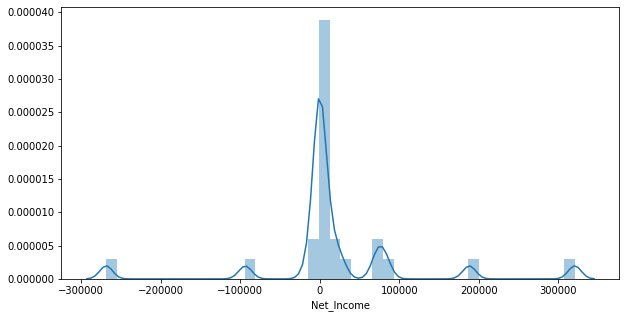

In [176]:
plt.figure(figsize = (10,5))
print('skew:', QB.Net_Income.skew())
sns.distplot(QB['Net_Income'])

# Feature forecast

In [177]:
from pandas import Series, DataFrame

# Correlation

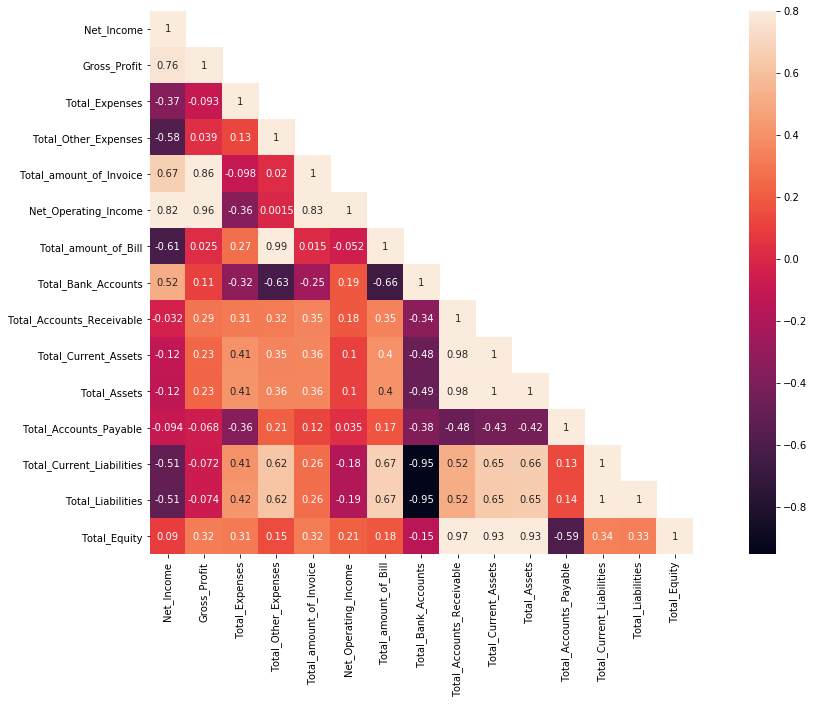

In [178]:
corrMat = QB.corr()
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False
plt.subplots(figsize=(20,10))
plt.xticks(rotation=60)
sns.heatmap(corrMat, mask=mask, vmax=0.8, square=True,annot=True)

In [179]:
print(corrMat['Net_Income'].sort_values(ascending=False))

Net_Income                   1.000000
Net_Operating_Income         0.815229
Gross_Profit                 0.762269
Total_amount_of_Invoice      0.669250
Total_Bank_Accounts          0.516662
Total_Equity                 0.089600
Total_Accounts_Receivable   -0.032395
Total_Accounts_Payable      -0.093849
Total_Current_Assets        -0.119354
Total_Assets                -0.124382
Total_Expenses              -0.369129
Total_Current_Liabilities   -0.507470
Total_Liabilities           -0.510618
Total_Other_Expenses        -0.577940
Total_amount_of_Bill        -0.614178
Name: Net_Income, dtype: float64


In [180]:
dic = corrMat["Net_Income"].to_dict()
lis = []
for i in dic.values():
    if abs(i) < 0.4:
        lis.append(i)
        
for j in dic.items():
    for k in lis:
        if j[1] == k:
            del QB[j[0]]

In [181]:
QB

,Date,Net_Income,Gross_Profit,Total_Other_Expenses,Total_amount_of_Invoice,Net_Operating_Income,Total_amount_of_Bill,Total_Bank_Accounts,Total_Current_Liabilities,Total_Liabilities
0,2018-09-01,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2018-10-01,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2018-11-01,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2018-12-01,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2019-01-01,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
5,2019-02-01,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
6,2019-03-01,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
7,2019-04-01,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
8,2019-05-01,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
9,2019-06-01,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00


In [187]:
QB.to_csv("Features.csv", index=False)

Get the new dataframe

# Scales data and separates data into training data and test data

In [188]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

In [189]:
model_df = QB

In [190]:
def tts(data):
    data = data.drop(["Net_Income", 'Date'], axis=1)
    train, test = data[0:22].values, data[-14:].values
    
    return train, test

train, test = tts(model_df)

In [191]:
train.shape, test.shape

((22, 8), (14, 8))

In [192]:
def scale_data(train_set, test_set):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train_set)
    
    train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
    train_set_scaled = scaler.transform(train_set)

    test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
    test_set_scaled = scaler.transform(test_set)

    X_train, y_train = train_set_scaled[:,1:], train_set_scaled[:, 0:1].ravel()
    X_test, y_test = test_set_scaled[:,1:], test_set_scaled[:, 0:1].ravel()
    
    return X_train, y_train, X_test, y_test, scaler

X_train, y_train, X_test, y_test, scaler_object = scale_data(train, test)

The purpose of scaling data is to eliminate the difference of characteristics and order of magnitude between different samples, and convert it into a dimensionless relative value. The value of each sample characteristic quantify is in the same order of magnitude.

In [193]:
def undo_scaling(y_pred, x_test, scaler_obj, lstm=False):
    y_pred = y_pred.reshape(y_pred.shape[0],1, 1)
    
    if not lstm:
        x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])
        
    pred_test_set = []
    for index in range(0, len(y_pred)):
        pred_test_set.append(np.concatenate([y_pred[index], x_test[index]], axis=1))
    
    pred_test_set = np.array(pred_test_set)
    pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])
    
    pred_test_set_inverted = scaler_obj.inverse_transform(pred_test_set)
    
    return pred_test_set_inverted

For visualizing and comparing results, undoes the scaling effect on predictions.

In [194]:
def predict_df(unscaled_predictions, original_df):
    result_list = []
    NI_dates = list(original_df[-15:].Date)
    act_NI = list(original_df[-14:].Net_Income)

    for index in range(0, len(unscaled_predictions)):
        result_dict = {}
        result_dict['pred_value'] = int(unscaled_predictions[index][0] + act_NI[index])
        result_dict['date'] = NI_dates[index+1]
        result_list.append(result_dict)

    df_result = pd.DataFrame(result_list)

    return df_result

Generates a dataframe that shows the predicted net income for each month for plotting results

In [229]:
model_scores = {}

def get_scores(unscaled_df, original_df, model_name):
    rmse = np.sqrt(mean_squared_error(original_df.Net_Income[-14:],unscaled_df.pred_value[-14:]))
    mae = mean_absolute_error(original_df.Net_Income[-14:], unscaled_df.pred_value[-14:])
    r2 = r2_score(original_df.Net_Income[-14:], unscaled_df.pred_value[-14:])
    model_scores[model_name] = [rmse, mae]
    
    print(model_name)
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae/100}%")
    print(f"R2 Score: {r2}")

Prints the root mean squared error, mean absolute error

In [196]:
def plot_results(results, original_df, model_name):
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.lineplot(original_df.Date, original_df.Net_Income, data=original_df, ax=ax, label='Original', color='mediumblue')
    sns.lineplot(results.date, results.pred_value, data=results, ax=ax, label='Predicted', color='red')
    ax.set(xlabel='Date', ylabel='Net Income', title=f"{model_name} Net Income Forecasting Prediction")
    ax.legend()
    sns.despine
    plt.savefig(f'{model_name}_forecast.png')

Plots predictions over original data to visualize results.

# Build Model

In [230]:
def regressive_model(train_data, test_data, model, model_name):
    
    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data, test_data)
    
    mod = model
    mod.fit(X_train, y_train)
    predictions = mod.predict(X_test)
    
    original_df = pd.read_csv('Features.csv')
    unscaled = undo_scaling(predictions, X_test, scaler_object)
    unscaled_df = predict_df(unscaled, original_df)
    
    plot_results(unscaled_df, original_df,model_name)
    get_scores(unscaled_df, original_df, model_name)
    
    a = original_df['Date'][11:]
    b = unscaled_df['pred_value']
    
    pred_df = pd.DataFrame(zip(a,b), columns = ['Date', 'prediction'])
    pred_dic = pred_df.set_index('Date').T.to_dict('list')
    pred_outcome = {model_name: pred_dic}

    return pred_outcome

Runs regressive models in SKlearn framework. First calls scale_data to split into X and y and scale the data. Then fits and predicts. Finally, predictions are unscaled, scores are printed, and results are plotted and saved.

##### Model 1 - Linear regression

LinearRegression
RMSE: 127354.34714161823
MAE: 883.9759214285715%
R2 Score: -0.00806887459033856


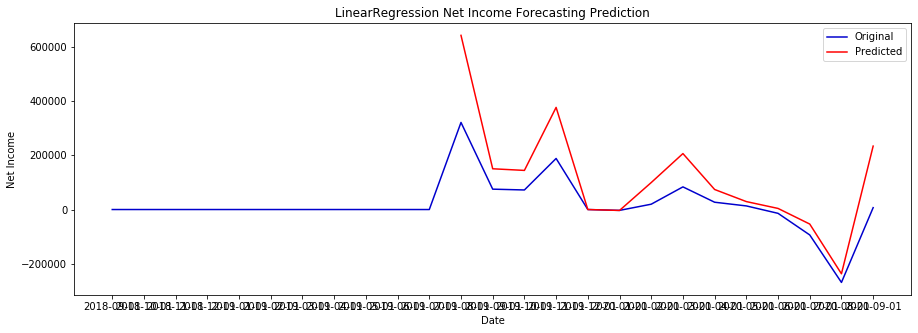

In [231]:
Linear_Regression = regressive_model(train, test, LinearRegression(), 'LinearRegression')

##### Model 2 - Random forest regressor

RandomForest
RMSE: 89999.0923804748
MAE: 672.0114500000001%
R2 Score: 0.49657020270227925


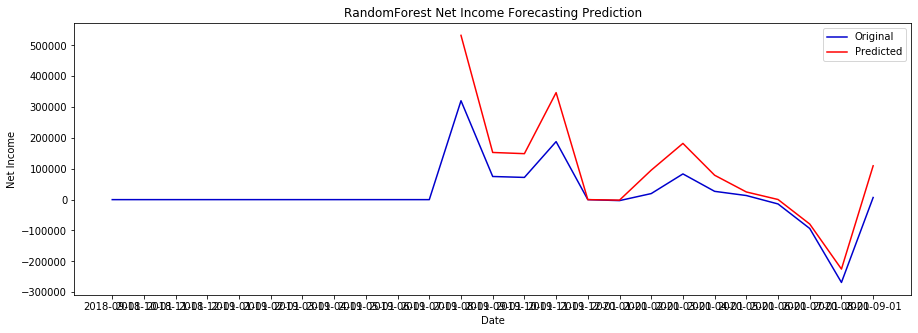

In [232]:
Random_Forest = regressive_model(train, test, RandomForestRegressor(n_estimators = 10), 'RandomForest')

##### Model 3 - XGBoost

XGBoost
RMSE: 122680.79715102386
MAE: 848.518592857143%
R2 Score: 0.06456021605346851


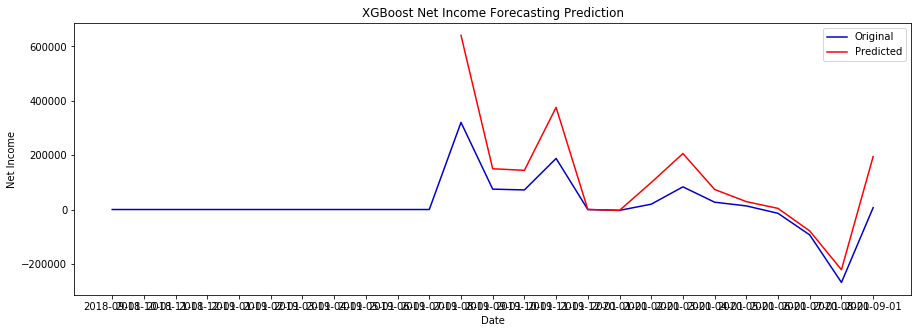

In [233]:
XGBoost = regressive_model(train, test, XGBRegressor(n_estimators=100, learning_rate=0.2, objective='reg:squarederror'),'XGBoost')

##### Model 4 - Long Short - Term Memory

In [234]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import LSTM

In [235]:
def lstm_model(train_data, test_data):
    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data, test_data)
    
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
    
    model = Sequential()
    model.add(LSTM(4, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True))
    model.add(Dense(1))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1, shuffle=False)
    predictions = model.predict(X_test, batch_size=1)
    
    original_df = pd.read_csv('Features.csv')
    unscaled = undo_scaling(predictions, X_test, scaler_object, lstm=True)
    unscaled_df = predict_df(unscaled, original_df)
    
    get_scores(unscaled_df, original_df, 'LSTM')
    plot_results(unscaled_df, original_df, 'LSTM')
    
    a = original_df['Date'][11:]
    b = unscaled_df['pred_value']
        
    pred_df = pd.DataFrame(zip(a,b), columns = ['Date', 'prediction'])
    pred_dic = pred_df.set_index('Date').T.to_dict('list')
    pred_outcome = {'LSTM':pred_dic}
    
    return pred_outcome

Epoch 1/200
22/22 [==============================] - 0s 1ms/step - loss: 0.8549
Epoch 2/200
22/22 [==============================] - 0s 804us/step - loss: 0.7130
Epoch 3/200
22/22 [==============================] - 0s 754us/step - loss: 0.5800
Epoch 4/200
22/22 [==============================] - 0s 771us/step - loss: 0.4920
Epoch 5/200
22/22 [==============================] - 0s 725us/step - loss: 0.4309
Epoch 6/200
22/22 [==============================] - 0s 722us/step - loss: 0.3870
Epoch 7/200
22/22 [==============================] - 0s 651us/step - loss: 0.3549
Epoch 8/200
22/22 [==============================] - 0s 635us/step - loss: 0.3306
Epoch 9/200
22/22 [==============================] - 0s 680us/step - loss: 0.3114
Epoch 10/200
22/22 [==============================] - 0s 680us/step - loss: 0.2957
Epoch 11/200
22/22 [==============================] - 0s 680us/step - loss: 0.2822
Epoch 12/200
22/22 [==============================] - 0s 680us/step - loss: 0.2703
Epoch 13/200
22

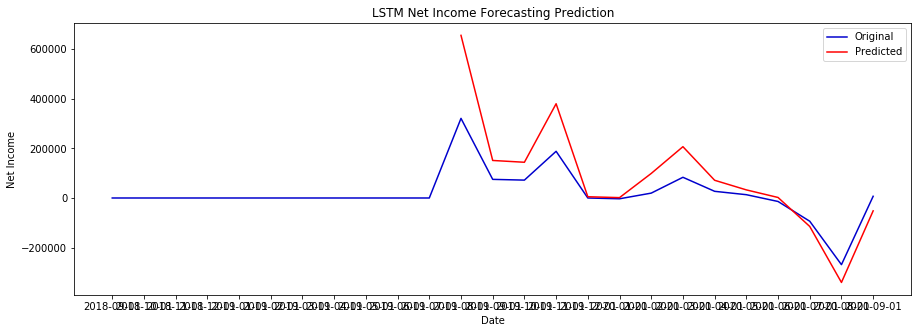

In [236]:
LSTM = lstm_model(train, test)

# Feature forecast

In [237]:
from collections import deque
import itertools

def moving_average(data_array, n=3):
    '''
    Calcuate the moving average based on the specific data array.
    :param data_array: the array stored data to be calculated.
    :param n: the number of data in one time
    :return: Generate which contains the result
     '''
    it = iter(data_array)
    
    d = deque(itertools.islice(it, n - 1))
    s = sum(d)
    # In the first round, to avoid getting extra element, so need zero in the head of queue.
    d.appendleft(0)
    for elem in it:
        s += elem - d.popleft()
        d.append(elem)
        yield s / float(n)

In [238]:
def MA(name):
    QB = pd.read_csv('Features.csv')
    Date = QB['Date'][2:].values.tolist()
    features = QB[name].values.tolist()
    features_MA = list(moving_average(features))
    
    #Put these lists together
    a = Date
    b = features_MA
    pred_df = pd.DataFrame(zip(a,b), columns = ['Date', 'prediction'])
    pred_dic = pred_df.set_index('Date').T.to_dict('list')
    pred_outcome = {'Moving Average':pred_dic}
    
    return pred_outcome

In [239]:
#You can change different features to get different outcome
MovingAverage = MA('Net_Income')

In [240]:
MovingAverage

{'Moving Average': {'2018-11-01': [0.0],
  '2018-12-01': [0.0],
  '2019-01-01': [0.0],
  '2019-02-01': [0.0],
  '2019-03-01': [0.0],
  '2019-04-01': [0.0],
  '2019-05-01': [0.0],
  '2019-06-01': [0.0],
  '2019-07-01': [0.0],
  '2019-08-01': [106866.66666666667],
  '2019-09-01': [131866.66666666666],
  '2019-10-01': [155866.66666666666],
  '2019-11-01': [111666.66666666667],
  '2019-12-01': [86666.66666666667],
  '2020-01-01': [61612.87666666667],
  '2020-02-01': [5487.876666666668],
  '2020-03-01': [33274.21],
  '2020-04-01': [43289.75],
  '2020-05-01': [41179.06],
  '2020-06-01': [8717.833333333334],
  '2020-07-01': [-31436.3],
  '2020-08-01': [-125347.27999999998],
  '2020-09-01': [-118365.71999999999]}}

# Save Prediction

In [241]:
def to_json(x):
    jsonData = json.dumps(x, indent=1)
    fileObject = open('Outcome.json', 'a+')
    fileObject.write(jsonData)
    fileObject.close()

Save all the predictions to json file

In [242]:
to_json(Linear_Regression)
to_json(Random_Forest)
to_json(XGBoost)
to_json(LSTM)
to_json(MovingAverage)